In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from prophet import Prophet

C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
#importing the dataset
chicago_df_1 = pd.read_csv("c:\\Users\\johnb\OneDrive\\Desktop\\project 1\\P74-Project-3\\Project 3\\Chicago_Crimes_2008_to_2011.csv", on_bad_lines=  'skip')
chicago_df_2 = pd.read_csv("c:\\Users\\johnb\\OneDrive\\Desktop\\project 1\\P74-Project-3\\Project 3\\Chicago_Crimes_2005_to_2007.csv",on_bad_lines = 'skip')
chicago_df_3 = pd.read_csv("c:\\Users\\johnb\\OneDrive\\Desktop\\project 1\\P74-Project-3\\Project 3\\Chicago_Crimes_2012_to_2017.csv",on_bad_lines = 'skip')


In [4]:
chicago_df_3.shape

(1456714, 23)

In [5]:
#Concatnate all the data together
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [6]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456704,6249417,10508666,HZ250497,05/03/2016 11:30:00 PM,053XX S PULASKI RD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,23.0,62.0,03,1150606.0,1868988.0,2016,05/10/2016 03:56:50 PM,41.796397,-87.723251,"(41.79639731, -87.723251281)"
1456705,6249592,10508671,HZ250526,05/03/2016 11:50:00 PM,036XX E 106TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,...,10.0,52.0,26,1202327.0,1835278.0,2016,05/10/2016 03:56:50 PM,41.702731,-87.534736,"(41.702731182, -87.534736413)"
1456706,6249615,10508672,HZ250441,05/03/2016 10:25:00 PM,071XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,18.0,66.0,08B,1158610.0,1857066.0,2016,05/10/2016 03:56:50 PM,41.763522,-87.694225,"(41.763522012, -87.69422464)"
1456707,6249936,10508675,HZ250502,05/03/2016 11:00:00 PM,085XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,21.0,71.0,03,1170146.0,1848113.0,2016,05/10/2016 03:56:50 PM,41.738711,-87.652203,"(41.738710803, -87.652202523)"
1456708,6250154,10508678,HZ250481,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,21.0,71.0,04B,1167880.0,1846134.0,2016,05/10/2016 03:56:50 PM,41.733329,-87.660561,"(41.733329054, -87.660561367)"
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [7]:
#plt.figure(figsize = (10, 10))
#sns.heatmap(chicago_df.isnull(), cbar = False, cmap = "YlGnBu")

In [8]:
chicago_df.drop(["Unnamed: 0", "Case Number", "ID", "IUCR", "X Coordinate", "Y Coordinate", "Updated On", "Year", "FBI Code", "Beat", "Ward", "Community Area", "Location", "District", "Latitude", "Longitude"], inplace = True, axis = 1)

In [9]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,10/07/2008 12:39:00 PM,000XX E 75TH ST,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False
1,10/09/2008 03:30:00 AM,048XX W POLK ST,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2,10/09/2008 08:35:00 AM,030XX W MANN DR,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False
3,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False
4,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True
...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [29]:
#changing the datetime
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = "%m/%d/%Y %I:%M:%S %p")
chicago_df.Date
chicago_df


,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2008-10-07 12:39:00,2008-10-07 12:39:00,000XX E 75TH ST,HOMICIDE,FIRST DEGREE MURDER,alley,True,False
2008-10-09 03:30:00,2008-10-09 03:30:00,048XX W POLK ST,HOMICIDE,FIRST DEGREE MURDER,street,True,False
2008-10-09 08:35:00,2008-10-09 08:35:00,030XX W MANN DR,HOMICIDE,FIRST DEGREE MURDER,park property,False,False
2008-10-10 02:33:00,2008-10-10 02:33:00,052XX W CHICAGO AVE,HOMICIDE,FIRST DEGREE MURDER,restaurant,False,False
2008-10-10 12:50:00,2008-10-10 12:50:00,026XX S HOMAN AVE,HOMICIDE,FIRST DEGREE MURDER,garage,False,True
...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,apartment,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,apartment,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,sidewalk,False,False


In [27]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [28]:
chicago_df["Primary Type"].value_counts()

Primary Type
THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                58

In [12]:
order_data = chicago_df["Primary Type"].value_counts().index.unique()
order_data

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE',
       'GAMBLING', 'INTERFERENCE WITH PUBLIC OFFICER', 'LIQUOR LAW VIOLATION',
       'ARSON', 'HOMICIDE', 'KIDNAPPING', 'INTIMIDATION', 'STALKING',
       'OBSCENITY', 'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'RITUALISM', 'NON-CRIMINAL (SUBJECT SPECIFIED)'],
      dtype='object', name='Primary Type')

<function matplotlib.pyplot.show(close=None, block=None)>

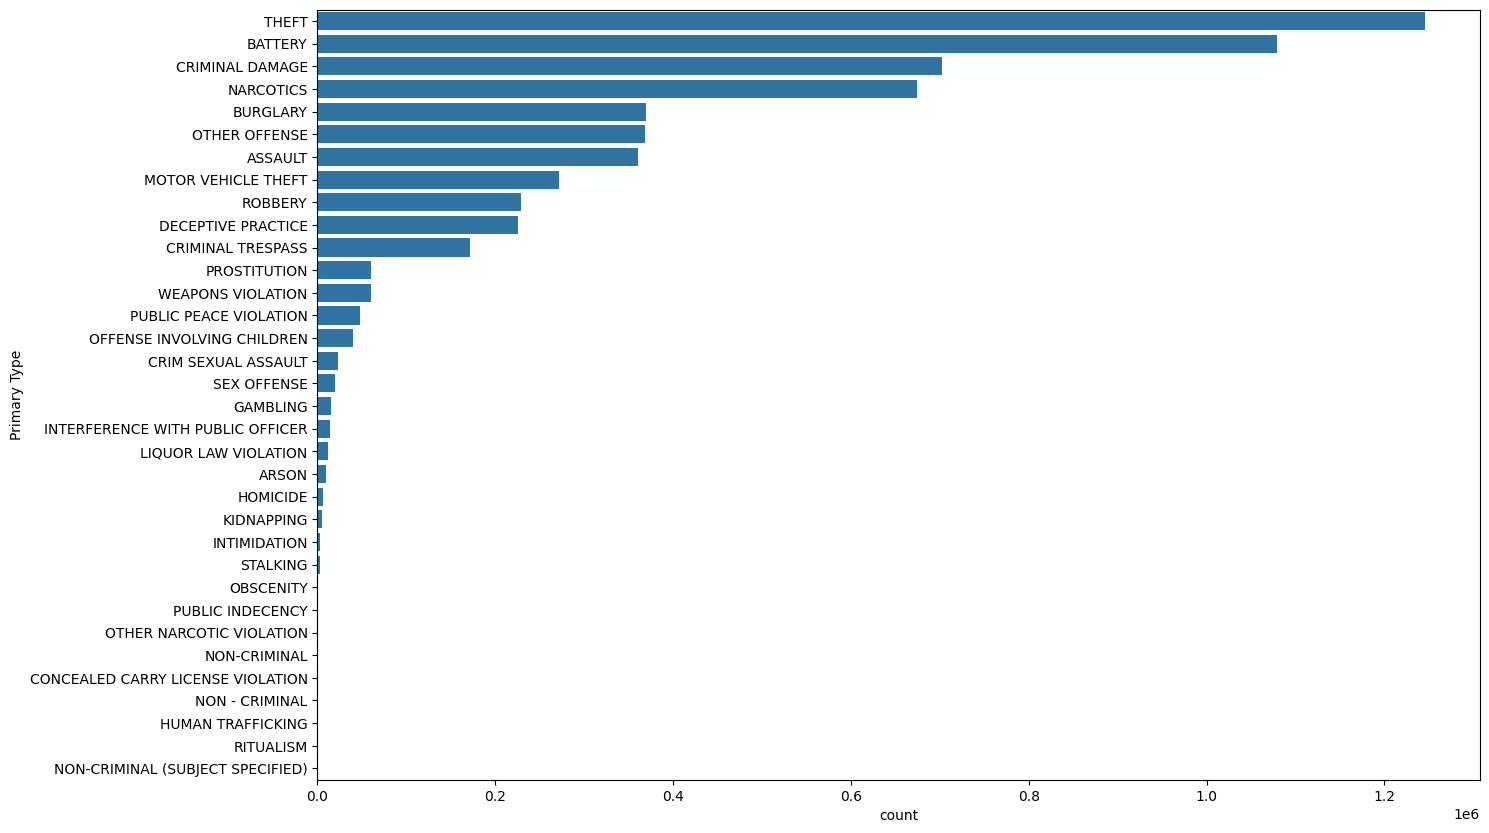

In [25]:
plt.figure(figsize = (15, 10))
sns.countplot(y = "Primary Type", data=chicago_df, order=order_data)
plt.show

In [30]:
#number of crime that occur each year
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

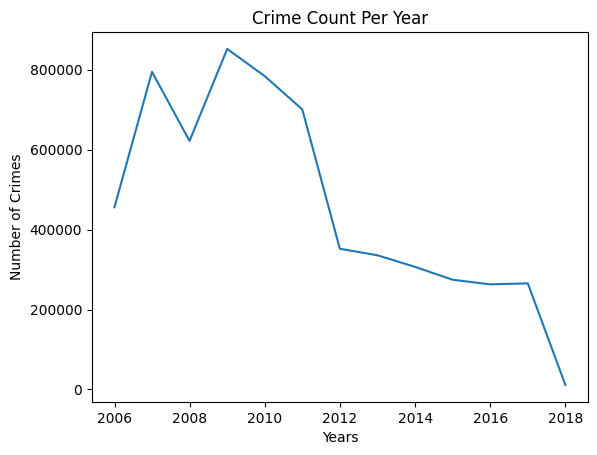

In [33]:
# visulaisation of number of crime that occur each year
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


In [35]:
chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [39]:
#naming the columns
chicago_prophet.columns = ['Date', 'Crime Count']
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [42]:
#renaming the columns
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date': 'ds', 'Crime Count': 'y'})
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [46]:
#making prediction
m = Prophet()
m.fit(chicago_prophet_df_final)

08:56:14 - cmdstanpy - INFO - Chain [1] start processing
08:56:15 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.833000,38469.795772,71841.638632,60454.833000,60454.833000,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,0.0,0.0,0.0,55692.442795
1,2005-02-28,60322.430432,34304.782344,67430.074184,60322.430432,60322.430432,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,0.0,0.0,0.0,50821.913052
2,2005-03-31,60175.841875,42639.961474,74441.383830,60175.841875,60175.841875,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,0.0,0.0,0.0,58951.694169
3,2005-04-30,60033.981981,44264.188324,77515.440902,60033.981981,60033.981981,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,0.0,0.0,0.0,61216.808655
4,2005-05-31,59887.393424,49382.082955,82339.323397,59887.393424,59887.393424,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,0.0,0.0,0.0,65385.640515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,10104.391329,-12897.126336,22386.670747,9957.052681,10262.989973,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,0.0,0.0,0.0,5126.468613
506,2018-01-28,10091.324708,-10768.230758,21993.034554,9943.603467,10250.527735,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,0.0,0.0,0.0,5168.754412
507,2018-01-29,10078.258087,-11006.944273,21334.889152,9930.154253,10238.065498,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,0.0,0.0,0.0,5210.368432
508,2018-01-30,10065.191466,-11809.163285,21937.898188,9916.669523,10225.603260,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,0.0,0.0,0.0,5248.478965


C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


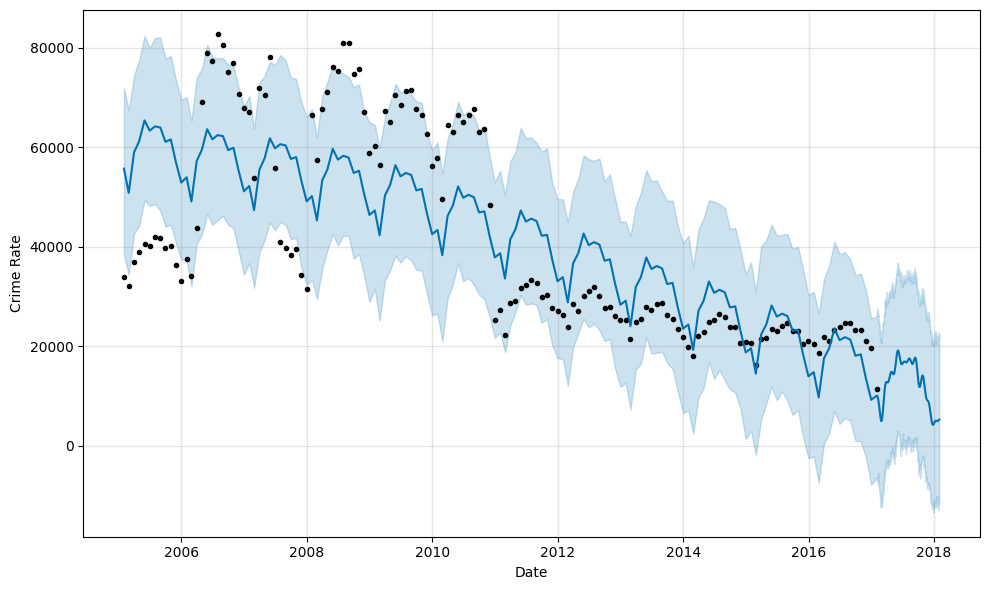

In [52]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Lo

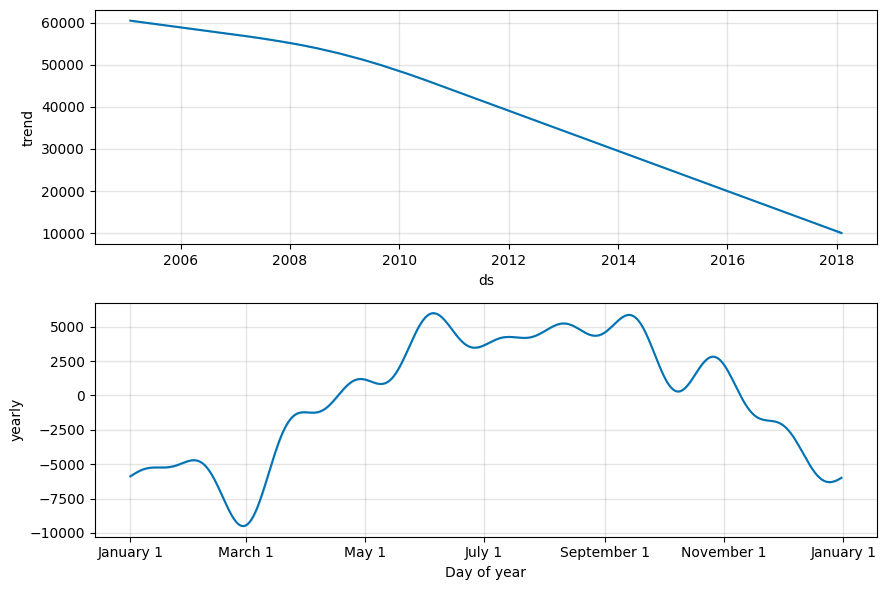

In [53]:
# seasonal crime rate prediction
figure = m.plot_components(forecast)